## Fitri Rahmadini
## 09011282126108
## SK 5C Indralaya

In [13]:
import skfuzzy as fuzz
from skfuzzy import control as ctr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1. Fuzzifikasi

Fuzzifikasi adalah proses konversi variabel input dalam suatu sistem ke dalam bentuk fuzzy atau nilai linguistik. Dalam konteks sistem kontrol fuzzy, variabel input seringkali bukan hanya memiliki nilai numerik yang tegas, tetapi dapat diungkapkan dalam bentuk linguistik seperti "rendah," "sedang," atau "tinggi." Fuzzifikasimemungkinkan penggunaan konsep ini dalam proses pengambilan keputusan.

Disini saya menggunakan (kurang,cukup,bagus),(rendah,standar,tinggi),(kurang,cukup,lengkap),(rendah,standar,tinngi). terdapat 3 variabel input yaitu : Kondisi,Harga Pasar dan Kelengkapan. Dan terdapat pula variabel Output yaitu : Harga Jual

## Variabel Input dan Output

In [14]:
kondisi = ctr.Antecedent(np.arange(0,101,1), 'kondisi') 
harga_pasar = ctr.Antecedent(np.arange(0,5501,1), 'harga_pasar') 
kelengkapan = ctr.Antecedent(np.arange(0,101,1), 'kelengkapan')
harga_jual = ctr.Consequent(np.arange(0,5001,1), 'harga_jual')

## Menentukan Fungsi Keanggotaan dari masing-masing Variabel

In [15]:
#input kondisi
kondisi['kurang'] = fuzz.trimf(kondisi.universe, [0, 0, 60])
kondisi['cukup'] = fuzz.trimf(kondisi.universe, [50, 65, 80,])
kondisi['bagus'] = fuzz.trimf(kondisi.universe, [70, 100, 100,])

#input harga pasar
harga_pasar['rendah'] = fuzz.trimf(harga_pasar.universe, [0, 0, 2750])
harga_pasar['standar'] = fuzz.trimf(harga_pasar.universe, [ 1500, 3000, 4500])
harga_pasar['tinggi'] = fuzz.trimf(harga_pasar.universe, [ 3500, 5500, 5500])

#input kelengkapan
kelengkapan['kurang'] = fuzz.trimf(kelengkapan.universe, [0, 0, 40])
kelengkapan['cukup'] = fuzz.trimf(kelengkapan.universe, [30, 55, 80])
kelengkapan['lengkap'] = fuzz.trimf(kelengkapan.universe, [65, 100, 100])

#output harga jual
harga_jual['rendah'] = fuzz.trimf(harga_jual.universe, [0, 0, 2500])
harga_jual['standar'] = fuzz.trimf(harga_jual.universe, [1500, 2750, 4000])
harga_jual['tinggi'] = fuzz.trimf(harga_jual.universe, [3000, 5000, 5000])

## Menampilkan Grafik

C:\Fitri\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


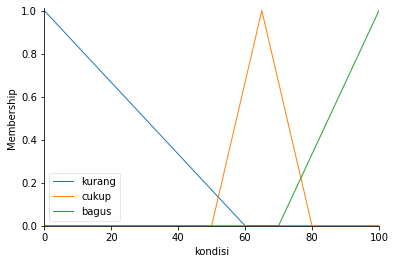

In [16]:
kondisi.view()

C:\Fitri\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


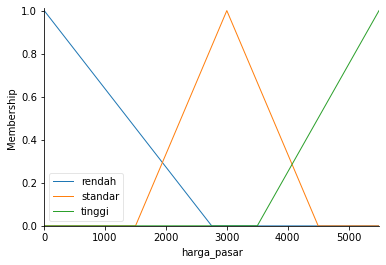

In [17]:
harga_pasar.view()

C:\Fitri\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


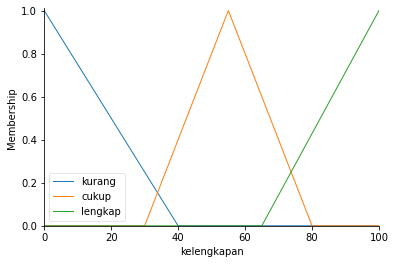

In [18]:
kelengkapan.view()

C:\Fitri\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


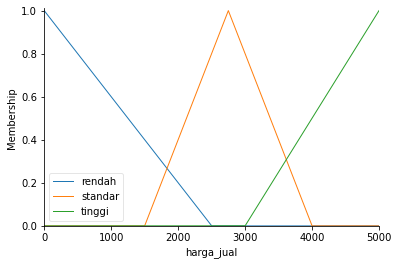

In [19]:
harga_jual.view()

## Rule Base

Rule base (basis aturan) dalam sistem kontrol fuzzy adalah kumpulan aturan-aturan yang mendefinisikan hubungan antara variabel input dan output. Aturan-aturan ini digunakan untuk mengambil keputusan atau menghasilkan output fuzzy berdasarkan input fuzzy yang diberikan.

In [20]:
rule1= ctr.Rule(kondisi['kurang'], harga_jual['rendah'])
rule2= ctr.Rule(harga_pasar['rendah'], harga_jual['rendah'])
rule3= ctr.Rule(kondisi['cukup'] & harga_pasar['standar'] & kelengkapan['kurang'], harga_jual['rendah'])

rule4= ctr.Rule(kondisi['cukup'] & harga_pasar['standar'], harga_jual['standar'])
rule5= ctr.Rule(kondisi['cukup'] & harga_pasar['tinggi'], harga_jual['tinggi'])
rule6= ctr.Rule(kondisi['bagus'] & harga_pasar['standar'] & kelengkapan['kurang'], harga_jual['rendah'])

rule7= ctr.Rule(kondisi['bagus'] & harga_pasar['standar'], harga_jual['standar'])
rule8= ctr.Rule(kondisi['bagus'] & harga_pasar['tinggi'] & kelengkapan['kurang'], harga_jual['rendah'])
rule9= ctr.Rule(kondisi['bagus'] & harga_pasar['tinggi'] & kelengkapan['cukup'], harga_jual['standar'])
rule10= ctr.Rule(kondisi['bagus'] & harga_pasar['tinggi'] & kelengkapan['lengkap'], harga_jual['tinggi'])

## Menampilkan Rule Base

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

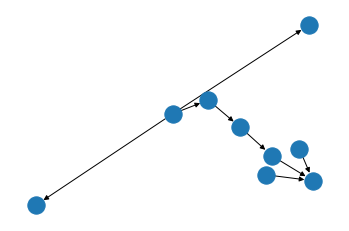

In [21]:
rule1.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

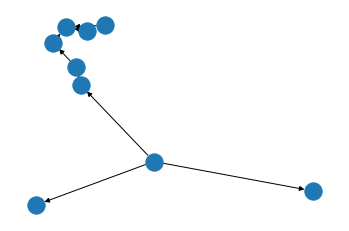

In [22]:
rule2.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

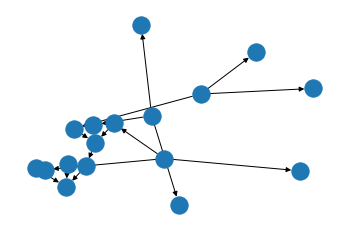

In [23]:
rule3.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

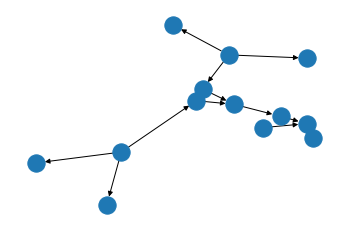

In [24]:
rule4.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

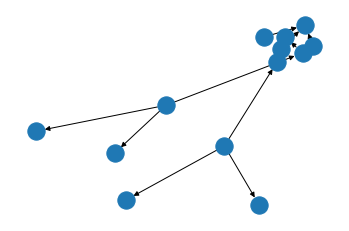

In [25]:
rule5.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

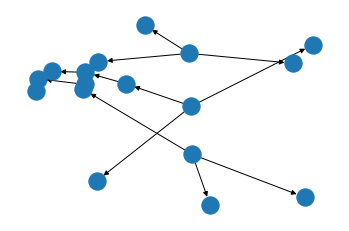

In [26]:
rule6.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

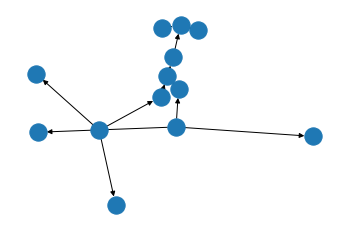

In [27]:
rule7.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

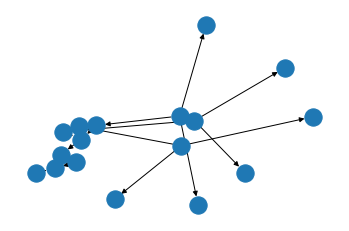

In [28]:
rule8.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

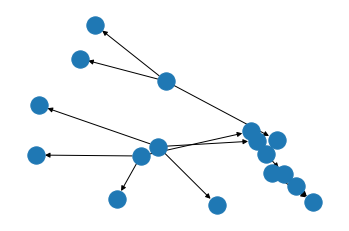

In [29]:
rule9.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

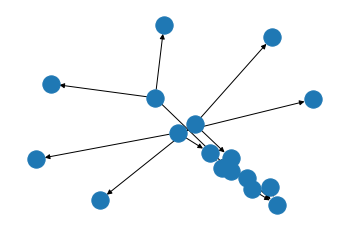

In [30]:
rule10.view()

## 2. Fuzzy Inference

Fuzzy inference (inferensi fuzzy) adalah proses pengambilan keputusan atau penarikan kesimpulan dalam sistem kontrol fuzzy. Proses ini melibatkan penggunaan aturan-aturan fuzzy yang telah ditentukan dalam basis aturan untuk menghasilkan output fuzzy berdasarkan input yang diberikan.

In [31]:
harga_jual_ctrl = ctr.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])

In [32]:
harga_jual_sim = ctr.ControlSystemSimulation(harga_jual_ctrl)

## 3. Defuzzyfikasi

Defuzzyfikasi adalah proses konversi nilai fuzzy atau output fuzzy menjadi nilai konkret atau crisp. Dalam sistem kontrol fuzzy, output dari proses inferensi fuzzy biasanya berupa himpunan fuzzy yang memerlukan konversi agar dapat diimplementasikan dalam keputusan atau tindakan konkret. Defuzzyfikasi adalah langkah terakhir dalam proses kontrol fuzzy.

In [33]:
harga_jual_sim.input['kondisi'] = 90
harga_jual_sim.input['harga_pasar'] = 4
harga_jual_sim.input['kelengkapan'] = 80

## Menampilkan Grafik

C:\Fitri\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


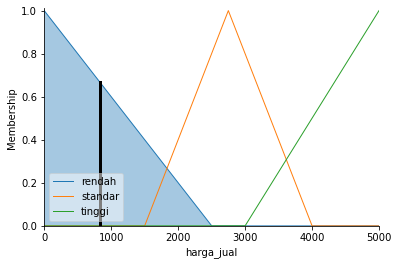

In [34]:
harga_jual_sim.compute()
harga_jual.view(sim=harga_jual_sim)

In [35]:
plt.show()